# 1.Setup

In [4]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import nltk

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# 2. Load Dataset

In [5]:
file_path = r"E:\My Drive\Indonesia AI\Fundamental NLP\Project 1\Data_Processed\tweet_bersih.csv"
df = pd.read_csv(file_path)

# 3.Persiapan Modelling

In [6]:
X = df['tweet_bersih']
y = df['sentimen']

In [7]:
# --- FEATURE ENGINEERING ---
# 1. Membuat fitur dari teks (TF-IDF)
vectorizer = TfidfVectorizer(max_features=800, min_df=3, ngram_range=(1, 3))
X_tfidf = vectorizer.fit_transform(df['tweet_bersih'])

# 2. Membuat fitur 'ada_tanda_tanya'
X_feature_tanya = df['tweet_bersih'].apply(lambda x: 1 if '?' in str(x) else 0)

# --- PENGGABUNGAN FITUR ✨---
# Menggabungkan matriks TF-IDF dengan fitur baru kita.
# .values.reshape(-1, 1) mengubah pandas Series menjadi format yang benar untuk digabungkan.
X = hstack([X_tfidf, X_feature_tanya.values.reshape(-1,1)])

# --- MENDEFINISIKAN TARGET ---
y = df['sentimen']

# --- SELESAI PREPROCESSING ---
print("✅ Tahap Preprocessing Selesai!")
print(f"Bentuk (shape) matriks fitur X final: {X.shape}")
print(f"Bentuk (shape) target y final: {y.shape}")

# --- SPLITTING DATA ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
print(f'\nUkuran data latih(X_train): {X_train.shape[0]}')
print(f'Ukuran data uji(X_test): {X_test.shape[0]}')

✅ Tahap Preprocessing Selesai!
Bentuk (shape) matriks fitur X final: (1815, 801)
Bentuk (shape) target y final: (1815,)

Ukuran data latih(X_train): 1452
Ukuran data uji(X_test): 363


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=16, stratify=y)

In [9]:
print(f'Ukuran data latih(X_train): {X_train.shape[0]}')
print(f'Ukuran data uji(X_test): {X_test.shape[0]}')

Ukuran data latih(X_train): 1542
Ukuran data uji(X_test): 273


# 4.Membuat Pipeline & Training Model

In [10]:
model_pipeline = MultinomialNB()

# Latih model dengan data training
print("Memulai training model Naive Bayes...")
model_pipeline.fit(X_train, y_train)
print("Training selesai!")

Memulai training model Naive Bayes...
Training selesai!


# 6.Evaluation


--- Hasil Evaluasi Model Naive Bayes ---
Akurasi: 0.6337
Akurasi pada data latih: 0.7432

Laporan Klasifikasi:
              precision    recall  f1-score   support

     negatif       0.59      0.70      0.64        90
      netral       0.68      0.58      0.63        91
     positif       0.65      0.62      0.63        92

    accuracy                           0.63       273
   macro avg       0.64      0.63      0.63       273
weighted avg       0.64      0.63      0.63       273


Confusion Matrix:


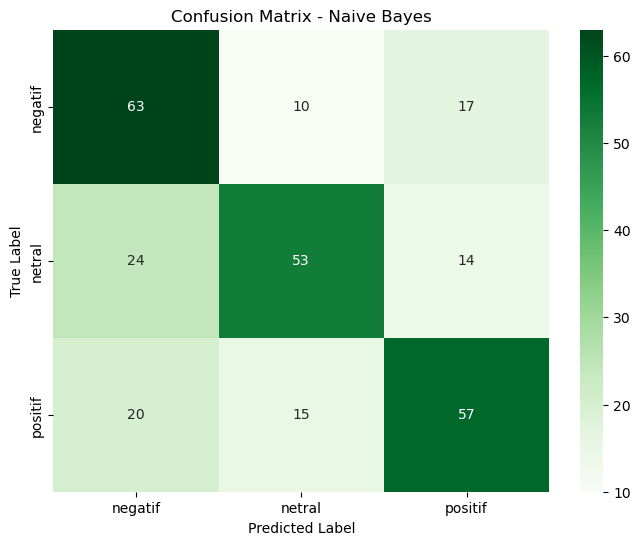

In [11]:
# 6. Melakukan Prediksi pada Data Test
y_pred = model_pipeline.predict(X_test)
y_train_pred = model_pipeline.predict(X_train)

# 7. Mengevaluasi Performa Model
print("\n--- Hasil Evaluasi Model Naive Bayes ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print(f"Akurasi pada data latih: {accuracy_score(y_train, y_train_pred):.4f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Membuat dan menampilkan Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=model_pipeline.classes_, yticklabels=model_pipeline.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()